# # Load and analyse model output ( 28 fevrier 2020)


## initializations

In [1]:
#standard notebook settings
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#standard libraries
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

import random as rn
import os
import matplotlib.pyplot as plt
#np.random.seed(1337) # for reproducibility
#np.random.seed(2000) 

In [3]:
#machine learning libraries
import tensorflow as tf 
import keras
print("tensorflow: ",tf.__version__, ", keras: ", keras.__version__)

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
print("sklearn: ", sklearn.__version__)

tensorflow:  2.0.0 , keras:  2.3.1
sklearn:  0.22.1


Using TensorFlow backend.


## starting the main code

In [4]:
myseed = 123467

np.random.seed(myseed) # necessary for starting Numpy generated random numbers in a well-defined initial state.
rn.seed(myseed+1) # necessary for starting core Python generated random numbers in a well-defined state.

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/fchollet/keras/issues/2280#issuecomment-306959926

os.environ['PYTHONHASHSEED'] = '0'

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from tensorflow.keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.compat.v2.random.set_seed(myseed+3)
#tf.set_random_seed(1234)

#sess = tf.compat.v2.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Load model and the images

In [6]:
from tensorflow.keras.models import load_model
model=load_model('Percolation_spanning_sgd_01_copy.h5') 

In [7]:
img_sizeX= 100
img_sizeY= img_sizeX
validation_split= 0.1

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=validation_split)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 16
num_classes=2
dataname = 'Percolation_desktop'
datapath = '../'+dataname
modelname = '/model_'+dataname
modelpath = datapath+modelname

In [9]:
# Part 2 - Fitting the CNN to the images


training_set = train_datagen.flow_from_directory('training_set_1000',
                                                 subset='training',
                                                 target_size = (img_sizeX,img_sizeY),
                                                 batch_size = batch_size, 
                                                 class_mode='binary',
                                                shuffle=True)




validation_set= train_datagen.flow_from_directory('training_set_1000', 
                                              subset='validation', 
                                              target_size = (img_sizeX,img_sizeY),
                                              batch_size = batch_size,
                                              class_mode='binary',
                                                 shuffle=False)



                               

                                        

                                                

Found 9001 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        6416      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0

## Confusion matrix and accuracy/loss 

In [11]:
Y_pred =model.predict_generator(validation_set,validation_set.samples // batch_size+1, verbose=1)
y_pred=(Y_pred > 0.5).astype(int)
conf=confusion_matrix(validation_set.classes, y_pred)
conf

63/63 [==============================] - 3s 41ms/step


array([[552,   0],
       [ 27, 420]])

In [12]:
import pickle 
f=open(modelpath+"_history.pckl","rb")
hist=pickle.load(f)
f.close()

In [13]:
hist

{'loss': [0.3496265856886016,
  0.17153970057856857,
  0.15192700887972704,
  0.13570252731748228,
  0.13032118515772295],
 'accuracy': [0.8399555, 0.92943794, 0.935448, 0.9406789, 0.9419032],
 'val_loss': [0.07667641107353472,
  0.1424524628326312,
  0.15705701829339827,
  0.24942443265970196,
  0.14561880096481483],
 'val_accuracy': [0.9969758, 0.9778226, 0.9828629, 0.8840726, 0.97278225]}

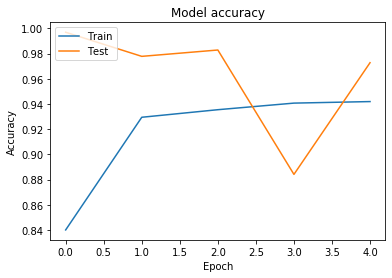

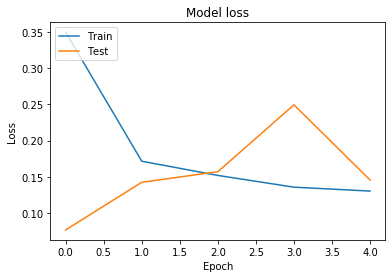

In [14]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
